## Classification of Breast Cancer Cell using a Deep Neural Network (ANN)

The objective of this notebook is to build a deep feedforward Artificial Neural Network (ANN) to automatically classify breast cancer tumors as benign or malignant based on cell sample features provided in the breastcancer_train.csv dataset. The project includes data preprocessing, model construction using TensorFlow/Keras, implementation of dropout layers for regularization, and the use of early stopping to prevent overfitting. Model performance will be evaluated using classification accuracy. This work simulates a real-world scenario in a scientific research lab focused on cancer diagnostics.

In [1]:
############################################
# Read data
############################################

# Import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# File paths for the datasets
train_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_train.csv'
test_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_test.csv'
aim_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_aim.csv'

# Read datasets and treat 'null' strings as NaN
df_train = pd.read_csv(train_file_path, na_values='null')
df_test = pd.read_csv(test_file_path, na_values='null')
df_aim = pd.read_csv(aim_file_path, na_values='null')

# Adjust data types
df_train['id'] = df_train['id'].astype('category')
df_train['class'] = df_train['class'].astype('category')
df_test['id'] = df_test['id'].astype('category')
df_test['class'] = df_test['class'].astype('category')
df_aim['id'] = df_aim['id'].astype('category')

# Drop missing values from training data
df_train = df_train.dropna()

**Train-Validation Split**
To evaluate the model's performance during training, I split the cleaned training dataset into a training and a validation set. I allocate 30% of the data to the validation set and ensure reproducibility by setting a fixed random_state. I also separate the feature matrix from the target vector for both training and validation subsets.

In [2]:
############################################
# Train-Validation Split 
############################################

# Import packages
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_train.drop(columns=['id', 'class'])
y = df_train['class'].astype(int)  # Convert class to int for modeling

# Train-validation split (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

**Data Preprocessing: Train-Validation Split, Feature Transformation, and Scaling**

- Split the dataset into training and validation sets.
- Create the feature matrices (X) and target vectors (y) for both training and validation sets.
- Address highly correlated data by applying scaling.

In [3]:
# Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target from the training data
X = df_train.drop(columns=['id', 'class'])
y = df_train['class'].astype(int)  # Convert 'class' to int for modeling

# Split the dataset into 70% training and 30% validation (stratified split to maintain class distribution)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training and validation feature data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Optional: Print the shapes to verify
print(f"Training set: {X_train_scaled.shape}, Validation set: {X_val_scaled.shape}")

Training set: (380, 10), Validation set: (163, 10)


**Model Building and Evaluation: Deep Feedforward ANN**

- Instantiate a deep feedforward neural network (ANN) with at least 5 hidden layers.
- Apply regularization using a dropout layer with a probability of 30%.
- Visualize the learning curves to observe the training process.
- Implement early stopping to avoid overfitting.
- Compare the performance of the regularized model with the model using early stopping.

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5117 - loss: 0.6966 - val_accuracy: 0.9264 - val_loss: 0.6029
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7908 - loss: 0.5892 - val_accuracy: 0.9632 - val_loss: 0.4297
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8413 - loss: 0.4265 - val_accuracy: 0.9755 - val_loss: 0.2008
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9213 - loss: 0.2511 - val_accuracy: 0.9816 - val_loss: 0.0851
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9551 - loss: 0.1477 - val_accuracy: 0.9755 - val_loss: 0.0666
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9717 - loss: 0.0948 - val_accuracy: 0.9755 - val_loss: 0.0693
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9506 - loss: 0.1478 - val_accuracy: 0.9693 - val_loss: 0.0781
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9837 - loss: 0.0601 - val_accuracy: 0.9755 - val_loss

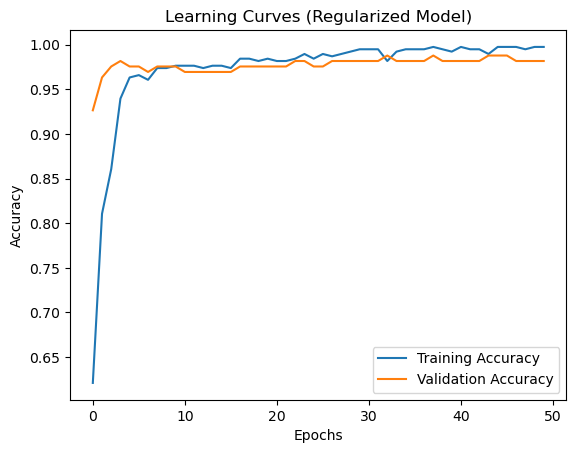

In [5]:
############################################
# Regularization with Dropout
############################################
# Regularization helps to avoid overfitting, which can be controlled by techniques like Dropout. 
# The dropout layer with a probability of 30% is set to randomly "drop" neurons during training, which forces the model to 
# rely on multiple paths, making it more robust.

# Import packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

############################################
# Suppress error warning
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
############################################

# Build the model with regularization (dropout layer)
model_reg = Sequential()

# Input layer
model_reg.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers with dropout
for _ in range(4):  # 4 additional hidden layers (5 layers in total)
    model_reg.add(Dense(50, activation='relu'))
    model_reg.add(Dropout(0.3))  # 30% dropout

# Output layer
model_reg.add(Dense(1, activation='sigmoid'))

# Compile the model
model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history_reg = model_reg.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

# Visualize learning curves for regularized model
plt.plot(history_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves (Regularized Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8541 - loss: 0.6063 - val_accuracy: 0.9755 - val_loss: 0.4218
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9712 - loss: 0.3650 - val_accuracy: 0.9755 - val_loss: 0.1681
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9700 - loss: 0.1388 - val_accuracy: 0.9755 - val_loss: 0.0756
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9768 - loss: 0.0618 - val_accuracy: 0.9693 - val_loss: 0.0766
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9674 - loss: 0.0941 - val_accuracy: 0.9816 - val_loss: 0.0625
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9816 - loss: 0.0532 - val_accuracy: 0.9693 - val_loss: 0.0683
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9829 - loss: 0.0470 - val_accuracy: 0.9693 - val_loss: 0.0699


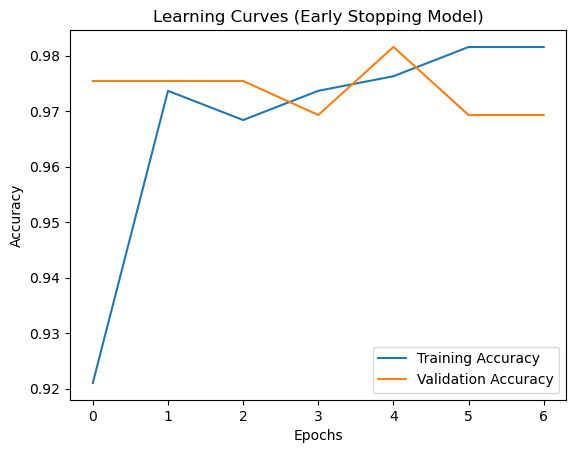

In [6]:
############################################
# Set up early stopping callback (stop if validation accuracy doesn't improve for 2 epochs)
############################################
# Early stopping is used to halt the training process when the model's performance stops improving on the validation set. 
# This can prevent the model from overfitting by stopping before it starts to memorize the data.

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Build the model without regularization
model_no_reg = Sequential()

# Input layer
model_no_reg.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers without dropout
for _ in range(4):  # 4 additional hidden layers (5 layers in total)
    model_no_reg.add(Dense(50, activation='relu'))

# Output layer
model_no_reg.add(Dense(1, activation='sigmoid'))

# Compile the model
model_no_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history_no_reg = model_no_reg.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1, callbacks=[early_stopping])

# Visualize learning curves for the model with early stopping
plt.plot(history_no_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves (Early Stopping Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
############################################
# Comparison of Performance
############################################
# To compare which model perfomer better

# Evaluate the models
val_loss_reg, val_acc_reg = model_reg.evaluate(X_val_scaled, y_val, verbose=0)
val_loss_no_reg, val_acc_no_reg = model_no_reg.evaluate(X_val_scaled, y_val, verbose=0)

# The results
print(f"Validation Accuracy of Regularized Model: {val_acc_reg:.4f}")
print(f"Validation Accuracy of Early Stopped Model: {val_acc_no_reg:.4f}")

Validation Accuracy of Regularized Model: 0.9816
Validation Accuracy of Early Stopped Model: 0.9816


**Evaluation**
The regularized model with dropout and the early-stopped model — have achieved identical validation accuracy of 0.9816.

This suggests that both approaches — regularization through dropout and early stopping — are effective at preventing overfitting and have similar performance in terms of generalization to the validation set.